**Importing Libraries and Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imagepath = '/content/drive/MyDrive/Resized_Images/Train/Unlabeled/10168.jpg'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.decomposition import PCA
import os, sys

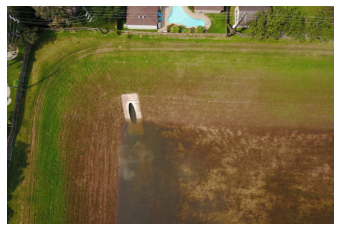

In [ ]:
image = mpimg.imread(imagepath)
plt.axis("off")
plt.imshow(image)
plt.show()

**Data Pre-processing**

In [ ]:
r,g,b = image[:,:,0],image[:,:,1],image[:,:,2]

In [ ]:
n_components = 450

**Training**

In [ ]:
pca_r = PCA(n_components)
pca_r.fit(r)
tpca_r = pca_r.transform(r)

In [ ]:
pca_g = PCA(n_components)
pca_g.fit(g)
tpca_g = pca_g.transform(g)

In [ ]:
pca_b = PCA(n_components)
pca_b.fit(b)
tpca_b = pca_b.transform(b)

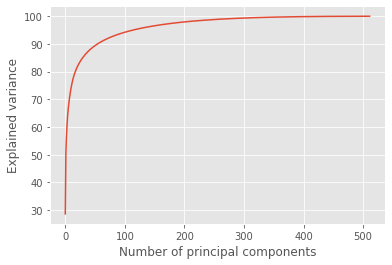

In [ ]:
plt.style.use('ggplot')
explained_var_ratio = np.cumsum(pca_r.explained_variance_ratio_ *100)
plt.plot(explained_var_ratio)
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance')
plt.show()

In [ ]:
r_reduced = pca_r.inverse_transform(tpca_r)
b_reduced = pca_b.inverse_transform(tpca_b)
g_reduced = pca_g.inverse_transform(tpca_g)

**Testing**

In [ ]:
compressed = np.dstack((r_reduced,g_reduced,b_reduced))

In [ ]:
compressed = normalize(compressed)

In [ ]:
compressedImage = Image.fromarray((compressed * 255).astype(np.uint8))

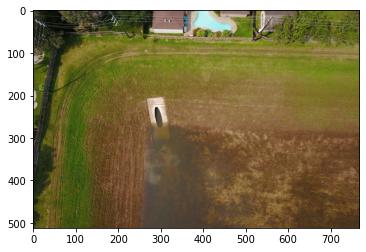

In [ ]:
plt.imshow(compressedImage)

In [ ]:
def normalize(x):
  return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

**PCA Function to compress all the images in the directories**

In [ ]:
def PCA_Alg(input_path, output_path, n_components=450):

  dirs = os.listdir(input_path)

  for item in dirs:

    image = mpimg.imread(input_path + item)
    f, e = os.path.splitext(input_path+item)     

    r,g,b = image[:,:,0],image[:,:,1],image[:,:,2]

    pca_r = PCA(n_components)
    pca_r.fit(r)
    tpca_r = pca_r.transform(r)

    pca_g = PCA(n_components)
    pca_g.fit(g)
    tpca_g = pca_g.transform(g)

    pca_b = PCA(n_components)
    pca_b.fit(b)
    tpca_b = pca_b.transform(b)

    r_reduced = pca_r.inverse_transform(tpca_r)
    b_reduced = pca_b.inverse_transform(tpca_b)
    g_reduced = pca_g.inverse_transform(tpca_g)

    compressed = np.dstack((r_reduced,g_reduced,b_reduced))
    compressed = normalize(compressed)

    compressedImage = Image.fromarray((compressed * 255).astype(np.uint8))

    compressedImage.save(output_path + f.rsplit('/', 1)[-1] + '.jpg')
    

**Unlabeled**

In [ ]:
input= '/content/drive/MyDrive/Resized_Images/Train/Unlabeled/'
output= '/content/drive/MyDrive/Compressed_PCA_Images/Train/Unlabeled/'

PCA_Alg(input, output, 450)

**Flooded**

In [ ]:
input= '/content/drive/MyDrive/Resized_Images/Train/Labeled/Flooded/'
output= '/content/drive/MyDrive/Compressed_PCA_Images/Train/Labeled/Flooded/'

PCA_Alg(input, output, 450)

**Non-Flooded**

In [ ]:
input= '/content/drive/MyDrive/Resized_Images/Train/Labeled/Non-Flooded/'
output= '/content/drive/MyDrive/Compressed_PCA_Images/Train/Labeled/Non-Flooded/'

PCA_Alg(input, output, 450)

**Test**

In [ ]:
input= "/content/drive/MyDrive/Resized_Images/Test/"
output= '/content/drive/MyDrive/Compressed_PCA_Images/Test/' 

PCA_Alg(input, output, 450)

**Validation**

In [ ]:
input= "/content/drive/MyDrive/Resized_Images/Validation/"
output= '/content/drive/MyDrive/Compressed_PCA_Images/Validation/' 

PCA_Alg(input, output, 450)

**References:**

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://github.com/LakshmanKishore/imageCompression